In [3]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import scipy 
import numpy as np
import random as rd
import nltk
import sklearn
from sklearn.neighbors import NearestNeighbors
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
from tqdm import tqdm

%matplotlib inline
nltk.download('stopwords')

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\igna-\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

# Análisis exploratorio

In [5]:
identity = pd.read_csv('train_identity.csv')
transaction = pd.read_csv('train_transaction.csv')

In [6]:
transaction.sample(n = 10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
479184,3466184,0,12435242,29.00,W,17399,111.00,150.00,mastercard,224.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
508920,3495920,0,13323391,171.00,W,16560,476.00,150.00,visa,126.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
398439,3385439,0,10033384,57.95,W,7835,361.00,150.00,visa,226.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6420,2993420,0,223396,59.00,W,2646,449.00,150.00,visa,166.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
586431,3573431,0,15698107,129.97,W,1279,237.00,150.00,mastercard,224.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
412275,3399275,0,10424115,77.00,W,8691,599.00,150.00,visa,166.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
288310,3275310,0,7085366,92.95,W,6174,490.00,150.00,visa,226.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
94715,3081715,0,1959067,51.25,C,9633,296.00,185.00,visa,138.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
192972,3179972,0,4325088,209.95,W,1412,555.00,150.00,visa,226.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
42702,3029702,0,1030326,22.04,C,5812,408.00,185.00,mastercard,224.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [7]:
identity.sample(n = 10)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
85896,3270231,-55.00,"160,474.00",0.00,0.00,0.00,0.00,nan,nan,0.00,...,chrome 64.0 for android,nan,NaN,NaN,F,F,T,F,mobile,HUAWEI RIO-L03 Build/HUAWEIRIO-L03
86102,3271192,-20.00,"299,302.00",nan,nan,0.00,0.00,nan,nan,nan,...,samsung browser 6.2,nan,NaN,NaN,F,F,T,F,mobile,SAMSUNG SM-G950F Build/NRD90M
40270,3084720,-5.00,"54,511.00",nan,nan,0.00,0.00,nan,nan,nan,...,mobile safari 11.0,32.00,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
67386,3170409,-5.00,"266,305.00",nan,nan,0.00,0.00,nan,nan,nan,...,chrome 63.0,nan,NaN,NaN,F,F,T,F,desktop,NaN
73431,3205917,-55.00,"303,629.00",0.00,0.00,1.00,-6.00,nan,nan,0.00,...,chrome 63.0,nan,NaN,NaN,F,F,T,F,desktop,NaN
143841,3575311,-25.00,"367,849.00",nan,nan,0.00,0.00,nan,nan,nan,...,mobile safari 11.0,nan,NaN,NaN,F,F,F,F,mobile,NaN
112962,3418627,-10.00,"40,135.00",0.00,0.00,2.00,-18.00,nan,nan,0.00,...,chrome 62.0,nan,NaN,NaN,F,F,T,F,desktop,NaN
58456,3122583,0.00,"231,167.00",nan,nan,0.00,0.00,nan,nan,nan,...,chrome 62.0 for android,nan,NaN,NaN,F,F,T,T,mobile,SM-J700M Build/MMB29K
20015,3045280,-5.00,"130,022.00",nan,nan,0.00,0.00,nan,nan,nan,...,mobile safari 11.0,32.00,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
143960,3576043,-5.00,"136,520.00",0.00,0.00,0.00,0.00,nan,nan,0.00,...,chrome 66.0 for android,nan,NaN,NaN,F,F,T,F,mobile,SM-J730GM Build/NRD90M


In [8]:
porcentajePorTipo = transaction.loc[transaction.isFraud == 1].groupby(by = 'card4').count().iloc[:,1]
total = transaction.groupby(by = 'card4').count().iloc[:,1]
porcentajePorTipo = (porcentajePorTipo / total).reset_index()

In [9]:
porcentajePorTipo

,card4,isFraud
0,american express,0.03
1,discover,0.08
2,mastercard,0.03
3,visa,0.03


Text(0, 0.5, 'Probabilidad')

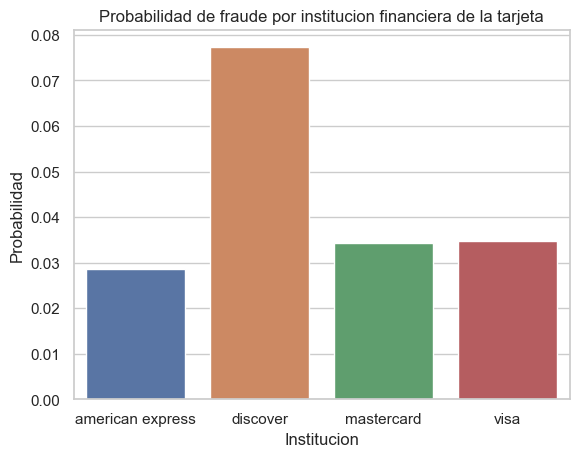

In [10]:
sns.barplot(data = porcentajePorTipo, x = 'card4', y = 'isFraud')
plt.title('Probabilidad de fraude por institucion financiera de la tarjeta')
plt.xlabel('Institucion')
plt.ylabel('Probabilidad')

In [11]:
transaction.isFraud.replace(0,'No', inplace = True)
transaction.isFraud.replace(1,'Si', inplace = True)
transaction

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,No,86400,68.50,W,13926,nan,150.00,discover,142.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2987001,No,86401,29.00,W,2755,404.00,150.00,mastercard,102.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,2987002,No,86469,59.00,W,4663,490.00,150.00,visa,166.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,2987003,No,86499,50.00,W,18132,567.00,150.00,mastercard,117.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,2987004,No,86506,50.00,H,4497,514.00,150.00,mastercard,102.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,No,15811047,49.00,W,6550,nan,150.00,visa,226.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
590536,3577536,No,15811049,39.50,W,10444,225.00,150.00,mastercard,224.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
590537,3577537,No,15811079,30.95,W,12037,595.00,150.00,mastercard,224.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
590538,3577538,No,15811088,117.00,W,7826,481.00,150.00,mastercard,224.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


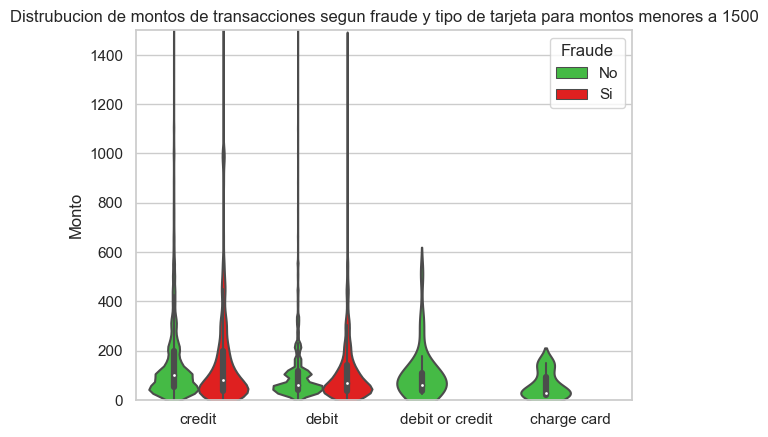

In [12]:
transaction['All'] = 1

ax = sns.violinplot( x= 'card6', y="TransactionAmt", hue="isFraud",

                 data=transaction.loc[transaction['TransactionAmt'] < 1500], palette = ['limegreen','red'], scale = 'width')
plt.title('Distrubucion de montos de transacciones segun fraude y tipo de tarjeta para montos menores a 1500')
plt.xlabel('')
plt.ylabel('Monto')
plt.ylim(0,1500)
plt.legend(title = "Fraude")
transaction.drop('All', axis=1, inplace=True)
plt.show()

In [13]:
mergeado = identity.merge(transaction, left_on='TransactionID', right_on='TransactionID',

          how = 'inner')

In [14]:
mergeado.id_31 = mergeado.id_31.astype(str)
mergeado.id_31

0             samsung browser 6.2
1              mobile safari 11.0
2                     chrome 62.0
3                     chrome 62.0
4                     chrome 62.0
                   ...           
144228    chrome 66.0 for android
144229    chrome 55.0 for android
144230    chrome 65.0 for android
144231                chrome 66.0
144232    chrome 66.0 for android
Name: id_31, Length: 144233, dtype: object

In [15]:
mergeado.id_31 = mergeado.id_31.map(lambda x : 'Google' if x.find('chrome') != -1 or x.find('google') != -1 else 
                                    'Safari' if x.find('safari') != -1 else 
                                    'Internet Explorer' if x.find('ie') != -1 or x.find('edge') != -1 else
                                    'Firefox' if x.find('firefox') != -1 else
                                    'Opera' if x.find('opera') != -1 else
                                    'Samsung Browser' if x.find('samsung') != -1 or x.find('Samsung') != -1 else
                                    'Others'
                                   )
mergeado.id_31.value_counts()

Google               76205
Safari               37281
Internet Explorer    16419
Firefox               7012
Others                4620
Samsung Browser       2247
Opera                  449
Name: id_31, dtype: int64

In [16]:
mergeado.ProductCD.value_counts()

C    62192
R    37548
H    32908
S    11585
Name: ProductCD, dtype: int64

In [17]:
heatmapplot = mergeado.loc[:,['isFraud','id_31','ProductCD']]
heatmapplot.isFraud.replace('No',0, inplace = True)
heatmapplot.isFraud.replace('Si',1, inplace = True)
heatmapplot.isFraud.replace('Yes',1, inplace = True)
heatmapplot = heatmapplot.groupby(['id_31','ProductCD']).sum() / heatmapplot.groupby(['id_31','ProductCD']).count()
heatmapplot.reset_index().set_index('id_31')

heatmapplot = pd.pivot_table(heatmapplot, values='isFraud', index=['id_31'],

                    columns=['ProductCD'], aggfunc=np.sum)
heatmapplot

ProductCD,C,H,R,S
id_31,,,,
Firefox,0.12,0.09,0.03,0.05
Google,0.14,0.05,0.03,0.07
Internet Explorer,0.07,0.02,0.02,0.03
Opera,0.35,0.03,0.28,0.00
Others,0.08,0.02,0.03,0.10
Safari,0.09,0.04,0.06,0.08
Samsung Browser,0.07,0.11,0.14,0.09


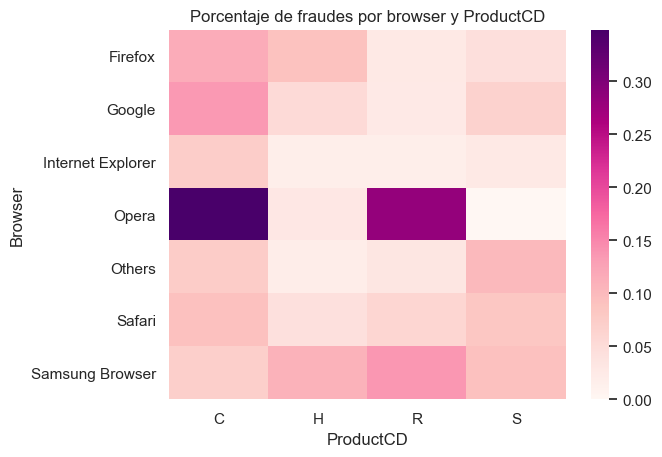

In [18]:

ax = sns.heatmap(heatmapplot, cmap='RdPu')
plt.title('Porcentaje de fraudes por browser y ProductCD')
plt.ylabel('Browser')
plt.show()

In [19]:
top6 = transaction.P_emaildomain.value_counts().nlargest(6).index.to_list()
filtrados = transaction.where(lambda x : x['P_emaildomain'].isin(top6))

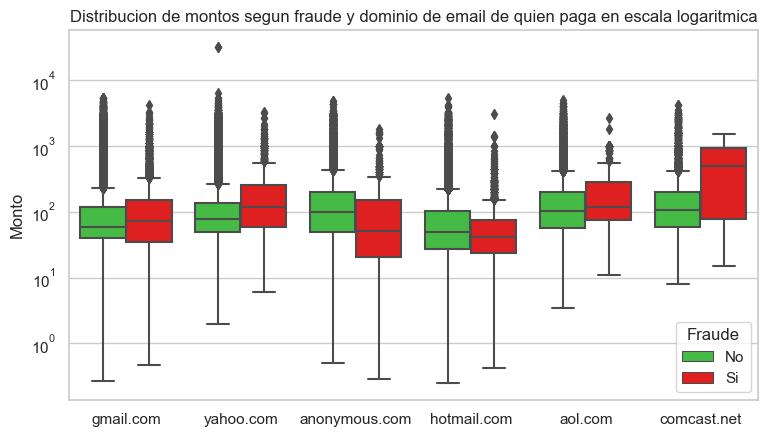

In [20]:
transaction['All'] = 1
plt.figure(figsize =  [8.9, 4.8],dpi = 100)

ax = sns.boxplot( x= 'P_emaildomain', y="TransactionAmt", hue="isFraud",

                 data= filtrados, palette = ['limegreen','red'])
plt.title('Distribucion de montos segun fraude y dominio de email de quien paga en escala logaritmica')
plt.xlabel('')
plt.ylabel('Monto')
plt.yscale('log')
plt.legend(title = "Fraude")
transaction.drop('All', axis=1, inplace=True)
plt.show()

In [21]:
transaction.sample(n = 10).iloc[:,0:18]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1
576159,3563159,No,15301281,69.95,W,14858,558.00,150.00,visa,226.00,debit,325.00,87.00,nan,nan,gmail.com,NaN,3.00
38458,3025458,Si,944130,59.23,C,5812,408.00,185.00,mastercard,224.00,debit,161.00,60.00,nan,nan,gmail.com,gmail.com,2.00
307559,3294559,No,7657435,39.00,W,4067,445.00,150.00,mastercard,224.00,debit,327.00,87.00,nan,nan,hotmail.com,NaN,12.00
20703,3007703,No,527957,226.00,W,12932,361.00,150.00,visa,226.00,debit,126.00,87.00,42.00,nan,gmail.com,NaN,1.00
523228,3510228,No,13737558,57.95,W,15790,472.00,150.00,visa,166.00,debit,299.00,87.00,14.00,nan,gmail.com,NaN,2.00
67581,3054581,No,1535503,117.00,W,2162,336.00,150.00,visa,226.00,credit,327.00,87.00,nan,nan,gmail.com,NaN,1.00
358499,3345499,No,8885902,30.95,W,7919,194.00,150.00,mastercard,166.00,debit,485.00,87.00,35.00,nan,NaN,NaN,5.00
500519,3487519,No,13120809,13.95,W,12544,321.00,150.00,visa,226.00,debit,476.00,87.00,20.00,nan,gmail.com,NaN,3.00
565850,3552850,No,15006349,504.67,W,6021,321.00,150.00,visa,226.00,credit,299.00,87.00,nan,nan,gmail.com,NaN,1.00
389842,3376842,No,9770190,13.11,C,3154,408.00,185.00,mastercard,224.00,debit,nan,nan,nan,nan,hotmail.com,hotmail.com,1.00


Text(0, 0.5, 'Frecuencia')

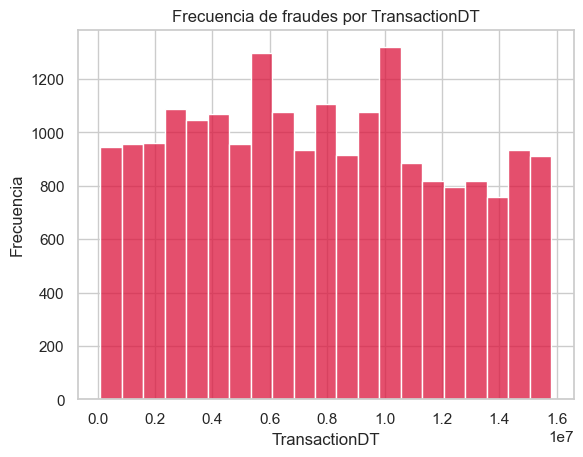

In [22]:
frauds = transaction.loc[transaction['isFraud'] == 'Si']
sns.histplot(data=frauds, x="TransactionDT",bins = 21 ,color = 'crimson')
plt.title('Frecuencia de fraudes por TransactionDT')
plt.ylabel('Frecuencia')

In [ ]:
sns.pairplot(mergeado)